<a href="https://colab.research.google.com/github/devreon/speechdetection/blob/main/3_knn_working.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import librosa
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import os
from PIL import Image
import pathlib
import csv
import warnings
warnings.filterwarnings('ignore')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:

col_names = ["filename","chroma_stft","spectral_centroid","spectral_bandwidth","rolloff","zero_crossing_rate","mfcc1",
             "mfcc2","mfcc3","mfcc4","mfcc5","mfcc6","mfcc7","mfcc8","mfcc9","mfcc10",
             "mfcc11","mfcc12","mfcc13","mfcc14","mfcc15","mfcc16","mfcc17","mfcc18","mfcc19","mfcc20","label" ]
data= pd.read_csv('/content/drive/MyDrive/Colab Notebooks/files ml/dataset.csv',names=col_names)



In [ ]:
data.head()

,filename,chroma_stft,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,mfcc2,mfcc3,mfcc4,...,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,label
spoof_37091.wav,0.420033,0.056105,1764.582936,1695.641552,3425.853596,0.105469,-327.592102,102.034782,-16.430794,21.890533,...,-11.703184,-7.020661,-7.965482,2.579074,-13.091953,3.571637,-5.131986,-2.202287,-2.737479,spoof
spoof_06886.wav,0.456435,0.028598,1430.370357,1603.140518,2950.642263,0.066064,-386.782562,122.185333,-1.890943,43.154488,...,-7.630654,11.223093,-9.024923,7.429202,1.026294,-1.348595,-1.014322,-1.787194,-4.415262,spoof
spoof_28883.wav,0.350484,0.050886,1516.282010,1304.641495,2702.085712,0.090832,-248.255005,144.137207,-70.691269,4.680120,...,-18.450655,-12.321146,-13.069722,3.656250,-11.329443,-6.328068,-5.595692,-2.265413,-5.227415,spoof
spoof_00777.wav,0.379468,0.148104,1255.565070,1231.397299,2212.950721,0.073952,-247.501114,122.452255,-7.395820,42.672604,...,-4.639747,10.081967,-18.033993,7.149973,-3.252098,-0.064411,-6.547152,1.762586,-2.525770,spoof
spoof_12805.wav,0.352107,0.103720,1751.768403,1572.164598,3395.446135,0.101421,-307.689178,104.868011,-12.415413,52.897938,...,-10.498528,2.115630,-8.498598,-2.090030,-14.033101,-4.524256,-7.129433,-11.333608,-6.645439,spoof


In [ ]:
col_names = ["filename","chroma_stft","spectral_centroid","spectral_bandwidth","rolloff","zero_crossing_rate",
             "mfcc1","mfcc2","mfcc3","mfcc4","mfcc5","mfcc6","mfcc7","mfcc8","mfcc9","mfcc10","mfcc11","mfcc12","mfcc13",
             "mfcc14","mfcc15","mfcc16","mfcc17","mfcc18","mfcc19","mfcc20","label" ]
data_1 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/files ml/dataset_1.csv', names=col_names)


In [ ]:
train = pd.concat([data , data_1]) 

In [ ]:
col_names = ["filename","chroma_stft","spectral_centroid","spectral_bandwidth","rolloff",
             "zero_crossing_rate","mfcc1","mfcc2","mfcc3","mfcc4","mfcc5","mfcc6","mfcc7",
             "mfcc8","mfcc9","mfcc10","mfcc11","mfcc12","mfcc13","mfcc14","mfcc15","mfcc16","mfcc17","mfcc18","mfcc19","mfcc20","label" ]
test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/files ml/test_dataset.csv', names=col_names)

In [ ]:
test.head()

,filename,chroma_stft,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,mfcc2,mfcc3,mfcc4,...,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,label
sample_2676.wav,0.458998,0.033419,1829.827605,1673.566797,3570.128854,0.106722,-342.406769,118.974388,-30.559280,8.945381,...,-16.937422,-3.963727,-1.938377,-4.434103,-12.668569,1.937222,-10.117148,-8.872097,-0.684537,test
sample_2163.wav,0.375488,0.051272,1677.109081,1248.675010,3044.877742,0.126581,-363.743652,130.536606,-41.701729,18.017271,...,-14.016382,4.012136,3.403578,-5.018793,2.141142,-4.784971,-8.950284,-1.512127,0.336039,test
sample_3439.wav,0.404272,0.018375,1342.752086,1368.444566,2621.714292,0.082137,-394.533173,151.639862,-39.820889,22.961452,...,-19.272455,-0.454443,-4.988553,-1.239288,-0.768517,8.344568,-6.109838,9.049260,2.737037,test
sample_2478.wav,0.494504,0.025993,1325.734187,1649.892482,2568.579853,0.054823,-349.904297,147.250809,-4.847887,33.614399,...,-6.277348,8.800126,-6.920827,14.616260,-2.811649,10.333988,0.916977,3.648958,-2.014412,test
sample_1759.wav,0.385920,0.009058,1558.904717,1671.358597,3368.331299,0.080718,-468.398163,125.014336,-24.143316,39.548317,...,-2.153363,2.283834,-8.819758,6.068522,-16.145859,-9.876472,-4.056511,-6.581894,-4.593599,test


In [ ]:
d={'spoof':0, 'human':1}#создаем словарь

In [ ]:
train['label']=train['label'].apply(lambda x:d[x]) #заменяем spoof на 0 и human на 1

In [ ]:
X_train= train.iloc[:,1:26]
y_train=train.iloc[:,26:]


In [ ]:
X_train

,chroma_stft,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,mfcc2,mfcc3,mfcc4,mfcc5,...,mfcc11,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20
spoof_37091.wav,0.056105,1764.582936,1695.641552,3425.853596,0.105469,-327.592102,102.034782,-16.430794,21.890533,-14.868243,...,-11.869798,-11.703184,-7.020661,-7.965482,2.579074,-13.091953,3.571637,-5.131986,-2.202287,-2.737479
spoof_06886.wav,0.028598,1430.370357,1603.140518,2950.642263,0.066064,-386.782562,122.185333,-1.890943,43.154488,-8.002848,...,-0.276474,-7.630654,11.223093,-9.024923,7.429202,1.026294,-1.348595,-1.014322,-1.787194,-4.415262
spoof_28883.wav,0.050886,1516.282010,1304.641495,2702.085712,0.090832,-248.255005,144.137207,-70.691269,4.680120,-22.634579,...,-12.267361,-18.450655,-12.321146,-13.069722,3.656250,-11.329443,-6.328068,-5.595692,-2.265413,-5.227415
spoof_00777.wav,0.148104,1255.565070,1231.397299,2212.950721,0.073952,-247.501114,122.452255,-7.395820,42.672604,-8.766631,...,-10.801827,-4.639747,10.081967,-18.033993,7.149973,-3.252098,-0.064411,-6.547152,1.762586,-2.525770
spoof_12805.wav,0.103720,1751.768403,1572.164598,3395.446135,0.101421,-307.689178,104.868011,-12.415413,52.897938,-4.346856,...,-6.316200,-10.498528,2.115630,-8.498598,-2.090030,-14.033101,-4.524256,-7.129433,-11.333608,-6.645439
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
human_05144.wav,0.035369,1666.445224,1680.453537,3431.358984,0.091227,-373.409668,111.125633,-7.870347,47.968105,-10.496546,...,-4.131451,-3.129457,-4.747880,-6.927934,1.249225,-9.031642,2.095737,-7.691368,-2.266002,-4.899436
human_04683.wav,0.008152,1053.356721,1610.275729,2416.108211,0.025237,-547.476318,112.288910,1.825431,50.201439,-0.951940,...,1.348451,0.352420,9.126329,-7.209496,13.495686,0.348115,0.394821,2.071590,5.805607,0.807630
human_06080.wav,0.037350,1076.768689,1287.298772,2175.267616,0.052013,-394.439484,153.894806,-1.640795,30.408468,-7.656665,...,-10.880634,-1.516111,-0.253519,-6.120222,4.000891,-11.488756,-0.012608,-3.344290,-6.870668,-6.877873
human_08961.wav,0.010711,2229.051717,1738.882639,3849.888259,0.163694,-468.392365,102.129402,-31.424906,22.489258,-40.724586,...,-10.763371,-9.127120,-4.531912,-11.693991,8.581714,-19.484686,5.289139,-7.655465,-5.996848,-3.382187


In [ ]:
y_train

,label
spoof_37091.wav,0
spoof_06886.wav,0
spoof_28883.wav,0
spoof_00777.wav,0
spoof_12805.wav,0
...,...
human_05144.wav,1
human_04683.wav,1
human_06080.wav,1
human_08961.wav,1


In [ ]:
X= train.iloc[:,1:26]
y=train.iloc[:,26:]


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
import pandas as pd 

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20) 

# Standardize features by removing mean and scaling to unit variance:
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test) 

# Use the KNN classifier to fit data:
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train) 

# save the model
import pickle
pickle.dump(classifier, open("classifier.pkl", "wb"))

# load the model
classifier = pickle.load(open("classifier.pkl", "rb"))
# Predict y data with classifier: 
y_predict = classifier.predict(X_test)
# Print results: 
print(confusion_matrix(y_test, y_predict))
print(classification_report(y_test, y_predict)) 






[[7793  128]
 [ 305 1774]]
              precision    recall  f1-score   support

           0       0.96      0.98      0.97      7921
           1       0.93      0.85      0.89      2079

    accuracy                           0.96     10000
   macro avg       0.95      0.92      0.93     10000
weighted avg       0.96      0.96      0.96     10000



In [ ]:


# Standardize features by removing mean and scaling to unit variance:

X_train=train.iloc[:,1:26]
y_train=train.iloc[:,26:]
X_test= test.iloc[:,1:26]
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Use the KNN classifier to fit data:
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train) 
y_pred = classifier.predict(X_test)
print(y_pred)


[0 0 0 ... 0 0 1]


In [ ]:
# save the model
import pickle
pickle.dump(classifier, open("classifier1.pkl", "wb"))

In [ ]:
test['label']=y_pred

In [ ]:
test.to_csv('testclassified.csv', sep=',')

In [ ]:
col_names = ["filename","chroma_stft","spectral_centroid","spectral_bandwidth","rolloff","zero_crossing_rate",
             "mfcc1","mfcc2","mfcc3","mfcc4","mfcc5","mfcc6","mfcc7","mfcc8","mfcc9","mfcc10","mfcc11","mfcc12",
             "mfcc13","mfcc14","mfcc15","mfcc16","mfcc17","mfcc18","mfcc19","mfcc20","label" ]
test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/files ml/testclassified.csv', names=col_names)

In [ ]:
test['label']

NaN                label
sample_2676.wav        0
sample_2163.wav        0
sample_3439.wav        0
sample_2478.wav        0
                   ...  
sample_0246.wav        0
sample_1391.wav        1
sample_2892.wav        0
sample_1560.wav        0
sample_4876.wav        1
Name: label, Length: 5001, dtype: object

Контрольное тестирование

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


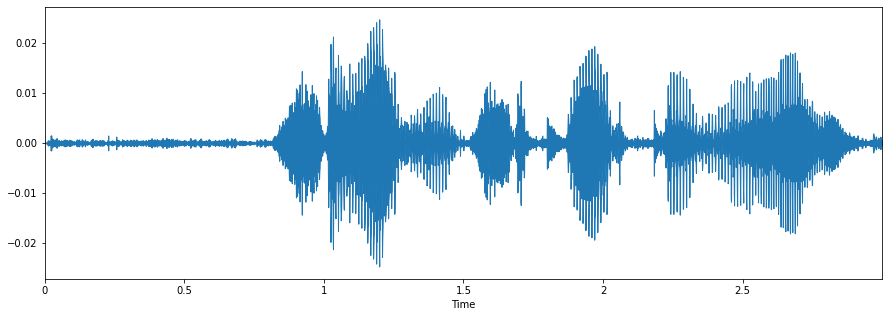

In [ ]:
import librosa
import matplotlib.pyplot as plt
import librosa.display
import os
import pathlib
import pandas as pd
import IPython.display as ipd
import sklearn
from google.colab import drive
drive.mount('/content/drive')
audio_data = '/content/drive/MyDrive/Colab Notebooks/files ml/New Recording.wav'
x , sr = librosa.load(audio_data, duration=3)
f_size = (15,5)
plt.figure(figsize=f_size)
librosa.display.waveplot(x, sr=sr)


In [ ]:
import numpy as np
import os
from PIL import Image
import pathlib
import csv
import warnings
warnings.filterwarnings('ignore')
import librosa
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
file_1 = open('/content/drive/MyDrive/Colab Notebooks/files ml/dataset_test_knn.csv', 'w', newline='')
k='test'
for filename in os.listdir(f'/content/drive/MyDrive/Colab Notebooks/files ml/testknn'):
    audioname = f'/content/drive/MyDrive/Colab Notebooks/files ml/testknn/{filename}'
    y, sr = librosa.load(audioname, mono=True, duration=3)
    rmse = librosa.feature.rms(y=y)
    chroma_stft = librosa.feature.chroma_stft(y=y, sr=sr)
    spec_cent = librosa.feature.spectral_centroid(y=y, sr=sr)
    spec_bw = librosa.feature.spectral_bandwidth(y=y, sr=sr)
    rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr)
    zcr = librosa.feature.zero_crossing_rate(y)
    mfcc = librosa.feature.mfcc(y=y, sr=sr)
    to_append = f'{filename} {np.mean(chroma_stft)} {np.mean(rmse)} {np.mean(spec_cent)} {np.mean(spec_bw)} {np.mean(rolloff)} {np.mean(zcr)}'    
    for e in mfcc:
        to_append += f' {np.mean(e)}'
    to_append += f' {k}'
    file_1 = open('dataset_test_knn.csv', 'a', newline='')
    with file_1:
        writer = csv.writer(file_1)
        writer.writerow(to_append.split())

In [ ]:
col_names = ["filename","chroma_stft","spectral_centroid","spectral_bandwidth",
             "rolloff","zero_crossing_rate","mfcc1","mfcc2","mfcc3","mfcc4","mfcc5","mfcc6",
             "mfcc7","mfcc8","mfcc9","mfcc10","mfcc11","mfcc12","mfcc13","mfcc14","mfcc15",
             "mfcc16","mfcc17","mfcc18","mfcc19","mfcc20","label" ]
test_data_ = pd.read_csv('dataset_test_knn.csv', names=col_names)

In [ ]:
test_data_.head()

filename  chroma_stft  spectral_centroid  \
New Recording.wav  0.462295     0.002545        2336.584653   
    synthesis.wav  0.328601     0.091756        1906.862286   

                   spectral_bandwidth      rolloff  zero_crossing_rate  \
New Recording.wav         2384.722138  4653.242375            0.105713   
    synthesis.wav         1489.509126  3384.274151            0.125319   

                        mfcc1       mfcc2      mfcc3      mfcc4  ...  \
New Recording.wav -577.507568   87.595505  25.261795  33.597153  ...   
    synthesis.wav -293.843079  121.335175 -21.358009  39.902298  ...   

                     mfcc12     mfcc13    mfcc14    mfcc15    mfcc16  \
New Recording.wav  3.298162  -3.854124  3.676778  0.004424  5.052385   
    synthesis.wav  5.022887 -12.342911  3.582949 -2.144744 -4.556304   

                     mfcc17    mfcc18    mfcc19    mfcc20  label  
New Recording.wav  2.104038  3.121542  0.210200  2.217537   test  
    synthesis.wav  6.715910 -5.814561  0.850045 -7.114777   test  

[2 rows x 27 columns]

In [ ]:
# Standardize features by removing mean and scaling to unit variance:
X_train=train.iloc[:,1:26]
y_train=train.iloc[:,26:]
X_test= test_data_.iloc[:,1:26]
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Use the KNN classifier to fit data:
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train) 
y_pred = classifier.predict(X_test)
print(y_pred)




[1 0]


1-human new recording. 


0-spoof new synthesis

In [ ]:
test_data_['label']=y_pred

In [ ]:
test_data_

filename  chroma_stft  spectral_centroid  \
New Recording.wav  0.462295     0.002545        2336.584653   
    synthesis.wav  0.328601     0.091756        1906.862286   

                   spectral_bandwidth      rolloff  zero_crossing_rate  \
New Recording.wav         2384.722138  4653.242375            0.105713   
    synthesis.wav         1489.509126  3384.274151            0.125319   

                        mfcc1       mfcc2      mfcc3      mfcc4  ...  \
New Recording.wav -577.507568   87.595505  25.261795  33.597153  ...   
    synthesis.wav -293.843079  121.335175 -21.358009  39.902298  ...   

                     mfcc12     mfcc13    mfcc14    mfcc15    mfcc16  \
New Recording.wav  3.298162  -3.854124  3.676778  0.004424  5.052385   
    synthesis.wav  5.022887 -12.342911  3.582949 -2.144744 -4.556304   

                     mfcc17    mfcc18    mfcc19    mfcc20  label  
New Recording.wav  2.104038  3.121542  0.210200  2.217537      1  
    synthesis.wav  6.715910 -5.814561  0.850045 -7.114777      0  

[2 rows x 27 columns]